## Временные ряды. 
### Итоговый проект. (Дмитрий Хотеенков, dhoteenkov@yahoo.com)

Подготовим срвзу все файлы используемые в итоговом проекте на основе 'train.csv':
1. 'train25.csv' - все транзакции магазина №25 сгуппированные по датам 
2. 'train103501.csv' - все транзакции товара №103501 сгуппированные по датам  
3. 'all_transactions.csv' - все транзакции сгуппированные по датам

Эти файлы я подготовил заранее и приложил к проекту, поэтому для ускорения проверки я перевел эти два параграфа ноутбука в NBConvert

### Практика. Разложение ряда на компоненты, тест на стационарность.

In [540]:
from statsmodels.tools.sm_exceptions import ConvergenceWarning
from statsmodels.tsa.seasonal import seasonal_decompose
from matplotlib import pyplot
from statsmodels.tsa.stattools import adfuller
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore', ConvergenceWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)


%matplotlib inline


df = pd.read_csv('train25.csv')  # считываем датасет

In [541]:
df.head()

,date,unit_sales
0,2013-01-01,2511.619
1,2013-01-02,5316.224
2,2013-01-03,4442.913
3,2013-01-04,4844.354
4,2013-01-05,5817.526


In [542]:
# приводим индексы к стандарту pd.Datetime, чтобы потом это можно было скормить seasonal_decompose
df = df.set_index(pd.DatetimeIndex(df['date']))
df.head()  # смотрим на результат

,date,unit_sales
date,,
2013-01-01,2013-01-01,2511.619
2013-01-02,2013-01-02,5316.224
2013-01-03,2013-01-03,4442.913
2013-01-04,2013-01-04,4844.354
2013-01-05,2013-01-05,5817.526


In [543]:
# замечаем, что т.к. у нас теперь есть индекс date, нам больше не нужен столбец date, который его дублирует
df.drop(['date'], axis=1, inplace=True)
df.head()  # снова проверяем, что все в порядке. вообще проверять данные на каждом шаге кода - хорошая привычка

,unit_sales
date,
2013-01-01,2511.619
2013-01-02,5316.224
2013-01-03,4442.913
2013-01-04,4844.354
2013-01-05,5817.526


In [544]:
df.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06', '2013-01-07', '2013-01-08',
               '2013-01-09', '2013-01-10',
               ...
               '2017-08-06', '2017-08-07', '2017-08-08', '2017-08-09',
               '2017-08-10', '2017-08-11', '2017-08-12', '2017-08-13',
               '2017-08-14', '2017-08-15'],
              dtype='datetime64[ns]', name='date', length=1618, freq=None)

<AxesSubplot:xlabel='date'>

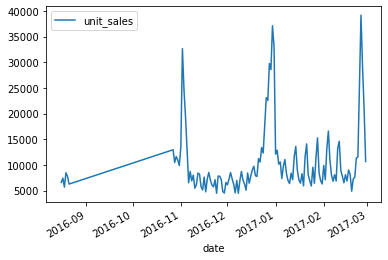

In [545]:
df[1320:1450].plot()  # В данных имеются пробелы...

In [546]:
df = df.asfreq('D')  # Проставим временнУю индексацию в пробелах данных
df = df.fillna(df.unit_sales.mean())  # Заполним эти пробелы

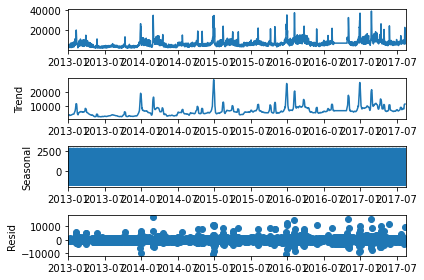

In [547]:
# применяем seasonal_decompose
# эта функция разложит ряд на трендовую, сезонную и шумовую составляющие
decomposition = seasonal_decompose(df, model='additive')
decomposition.plot()
pyplot.show()  # любуемся результатом

trend_part = decomposition.trend  # отдельно трендовая составляющаяя
seasonal_part = decomposition.seasonal  # отдельно сезонная составляющаяя
residual_part = decomposition.resid  # отдельно шум: то, что осталось

### Трендовая составляющая не определилась -> попробуем принудительно повысить период сезонности или сменить частоту ряда.

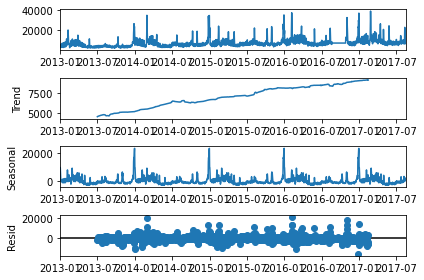

In [548]:
# применяем seasonal_decompose
# эта функция разложит ряд на трендовую, сезонную и шумовую составляющие
decomposition = seasonal_decompose(df, model='additive', period=365)
decomposition.plot()
pyplot.show()  # любуемся результатом

trend_part = decomposition.trend  # отдельно трендовая составляющаяя
seasonal_part = decomposition.seasonal  # отдельно сезонная составляющаяя
residual_part = decomposition.resid  # отдельно шум: то, что осталось

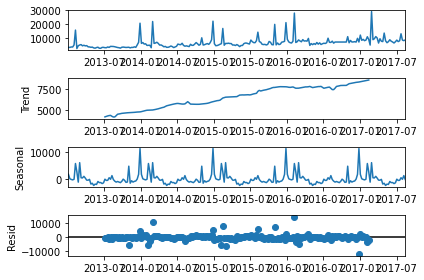

In [549]:
# применяем seasonal_decompose
# эта функция разложит ряд на трендовую, сезонную и шумовую составляющие
decomposition = seasonal_decompose(df.asfreq('W'), model='additive')
decomposition.plot()
pyplot.show()  # любуемся результатом

trend_part_W = decomposition.trend  # отдельно трендовая составляющаяя
seasonal_part_W = decomposition.seasonal  # отдельно сезонная составляющаяя
residual_part_W = decomposition.resid  # отдельно шум: то, что осталось

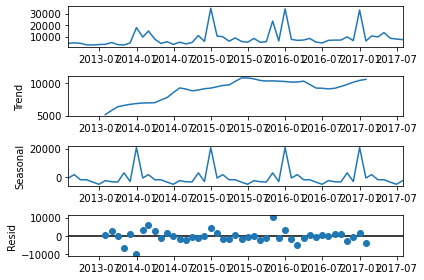

In [550]:
# применяем seasonal_decompose
# эта функция разложит ряд на трендовую, сезонную и шумовую составляющие
decomposition = seasonal_decompose(df.asfreq('M'), model='additive')
decomposition.plot()
pyplot.show()  # любуемся результатом

trend_part_M = decomposition.trend  # отдельно трендовая составляющаяя
seasonal_part_M = decomposition.seasonal  # отдельно сезонная составляющаяя
residual_part_M = decomposition.resid  # отдельно шум: то, что осталось

1. Сколько элементов содержит исходный датасет? 

In [551]:
print('Элементов с дневной частотой:', df.shape[0])
print('Элементов с недельной частотой:', df.asfreq('W').shape[0])
print('Элементов с месячной частотой:', df.asfreq('M').shape[0])

Элементов с дневной частотой: 1688
Элементов с недельной частотой: 241
Элементов с месячной частотой: 55


2. Сколько элементов содержит шумовая часть?

In [552]:
print('Элементов с дневной частотой:', residual_part.shape[0])
print('Элементов с недельной частотой:', residual_part_W.shape[0])
print('Элементов с месячной частотой:', residual_part_M.shape[0])

Элементов с дневной частотой: 1688
Элементов с недельной частотой: 241
Элементов с месячной частотой: 55


3. Сколько числовых элементов содержит шумовая часть?

In [553]:
print('Элементов с дневной частотой:', residual_part.dropna().shape[0])
print('Элементов с недельной частотой:', residual_part_W.dropna().shape[0])
print('Элементов с месячной частотой:', residual_part_M.dropna().shape[0])

Элементов с дневной частотой: 1324
Элементов с недельной частотой: 189
Элементов с месячной частотой: 43


4. Сколько элементов содержит сезонная часть?

In [554]:
print('Элементов с дневной частотой:', seasonal_part.shape[0])
print('Элементов с недельной частотой:', seasonal_part_W.shape[0])
print('Элементов с месячной частотой:', seasonal_part_M.shape[0])

Элементов с дневной частотой: 1688
Элементов с недельной частотой: 241
Элементов с месячной частотой: 55


5. Сколько числовых элементов содержит трендовая часть?

In [555]:
print('Элементов с дневной частотой:', trend_part.dropna().shape[0])
print('Элементов с недельной частотой:', trend_part_W.dropna().shape[0])
print('Элементов с месячной частотой:', trend_part_M.dropna().shape[0])

Элементов с дневной частотой: 1324
Элементов с недельной частотой: 189
Элементов с месячной частотой: 43


In [556]:
for freqstr in ['D', 'W', 'M']:
    print('Частота ряда:', freqstr)
    test = adfuller(df['unit_sales'].asfreq(freqstr))
    print('adf: ', test[0])
    print('p-value: ', test[1])
    print('Critical values: ', test[4])
    if test[0] > test[4]['5%']:  # проверка, больше ли критического полученное значение для нашего ряда
        print(f'Ряд НЕ стационарен для частоты ряда {freqstr}')
    else:
        print(f'Ряд Стационарен для частоты ряда {freqstr}')

Частота ряда: D
adf:  -5.028066986047592
p-value:  1.9522946959586582e-05
Critical values:  {'1%': -3.4342906911169404, '5%': -2.8632805908715726, '10%': -2.5676966486957706}
Ряд Стационарен для частоты ряда D
Частота ряда: W
adf:  -2.167007494595137
p-value:  0.21843693549544174
Critical values:  {'1%': -3.458854867412691, '5%': -2.8740800599399323, '10%': -2.573453223097503}
Ряд НЕ стационарен для частоты ряда W
Частота ряда: M
adf:  -2.408484361076739
p-value:  0.13935606587626886
Critical values:  {'1%': -3.5925042342183704, '5%': -2.931549768951162, '10%': -2.60406594375338}
Ряд НЕ стационарен для частоты ряда M


#### Анализ результата:

В ряде на месячных и недельных данных явно присутствуют тренды на рост  и сезонность (что подтверждается тестом Д-Ф)

На дневных данных тест показывает стационарность ряда...

### Особенности валидации временных рядов

In [557]:
from sklearn.model_selection import TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=3, test_size=7)
train_test_groups = tscv.split(df.unit_sales)
for train_index, test_index in train_test_groups:
    print("TRAIN size:", len(train_index), "TEST size:", len(test_index))

TRAIN size: 1667 TEST size: 7
TRAIN size: 1674 TEST size: 7
TRAIN size: 1681 TEST size: 7


### Продолжаем выполнять проект в Jupyter Notebook. Оконные расчеты.


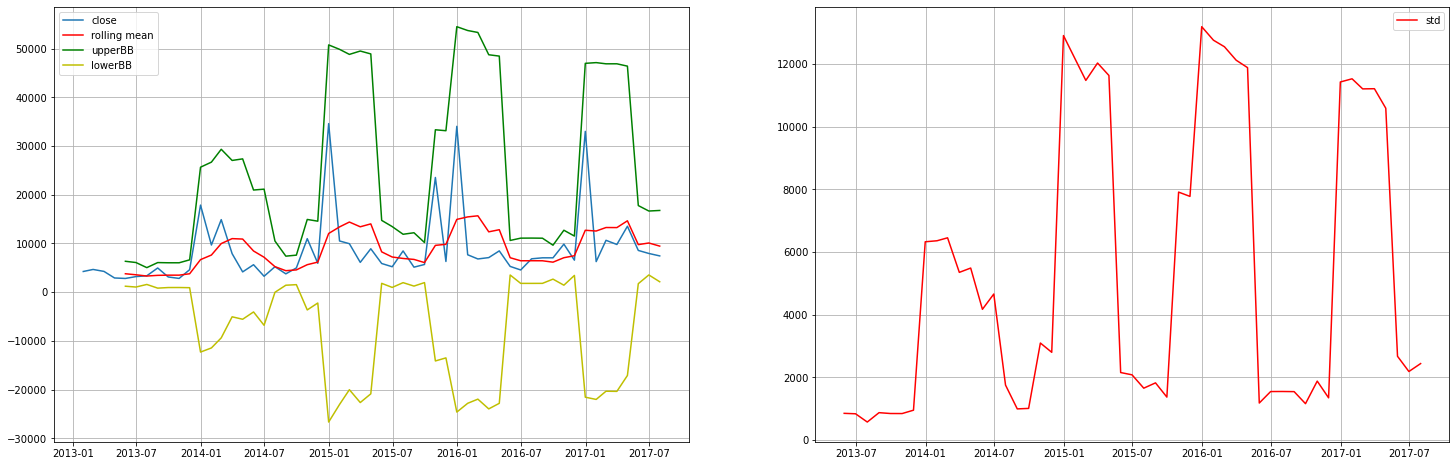

In [558]:
import matplotlib.pyplot as plt
%matplotlib inline

# 1 Выберите временной ряд для одного магазина (можно использовать из прошлого задания).
df_ = df.asfreq('M')  # Возьмем ряд месячных данных
df_ = df_.rename(columns={'unit_sales': 'close'})

# 2 Постройте скользящее среднее c окном 5
df_['rolling_mean'] = df_.close.rolling(window=5).mean()

# 3 Постройте скользящее квадратическое отклонение c окном 5.
df_['rolling_std'] = df_.close.rolling(window=5).std()

# 4 Постройте так называемые линии Боллинджера с окном в 30.

df_['upperBB'] = df_['rolling_mean'] + 3 * df_['rolling_std']
df_['lowerBB'] = df_['rolling_mean'] - 3 * df_['rolling_std']

# Отобразите эти оконные факторы на графике.

f, ax = plt.subplots(1, 2, figsize=(25, 8))
ax[0].plot(df_.index, df_.close)  # исходные данные
ax[0].plot(df_.index, df_.rolling_mean, c='r')  # оконное среднее
ax[0].plot(df_.index, df_.upperBB,  c='g')  # верхняя линия Боллинджера
ax[0].plot(df_.index, df_.lowerBB,  c='y')  # нижняя линия Боллинджера
ax[0].legend(['close', 'rolling mean', 'upperBB', 'lowerBB'])
ax[0].grid()

ax[1].plot(df_.index, df_.rolling_std, c='r')  # оконное стандартное отклонение
ax[1].legend(['std'])
ax[1].grid()
plt.show()

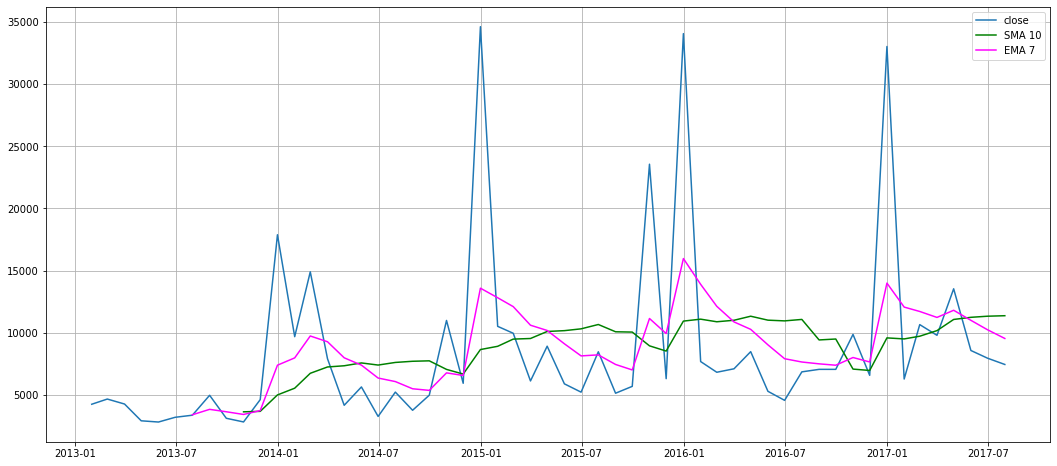

In [559]:
# Постройте оконное среднее с окном в 10 точек.

N = 10
df_['rolling_mean_' + str(N)] = df_.close.rolling(window=N).mean()

# Постройте экспоненциально среднее с окном в 7 точек (span=7).
Ne = 7
df_['rolling_ema_' + str(Ne)] = df_.close.ewm(min_periods=Ne, span=Ne).mean()

f, ax = plt.subplots(1, 1, figsize=(18, 8))
ax.plot(df_.index, df_.close)  # исходные данные
ax.plot(df_.index, df_['rolling_mean_' + str(N)],  c='g')  # оконное среднее
ax.plot(df_.index, df_['rolling_ema_' + str(Ne)],
        c='magenta')  # оконное экспоненциальное среднее
ax.legend(['close', 'SMA ' + str(N), 'EMA ' + str(Ne)])
ax.grid()

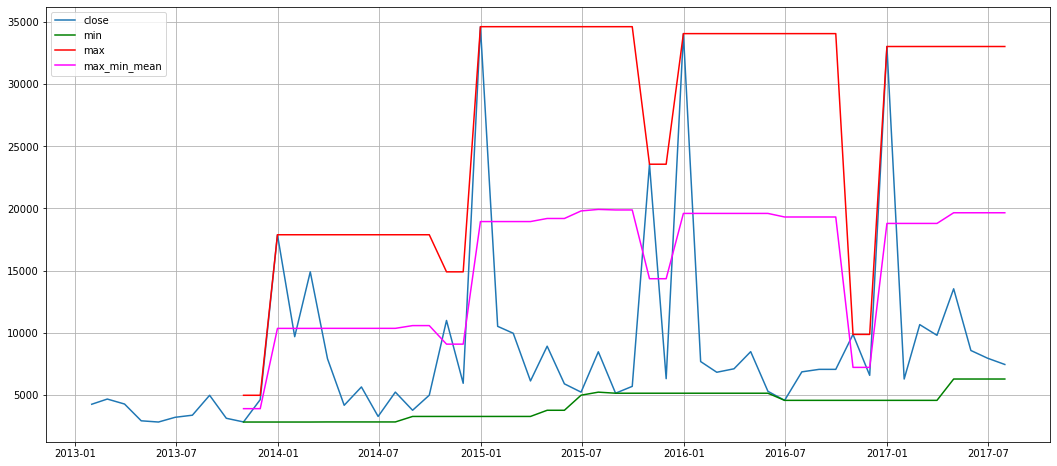

In [560]:
# Напишите свою скользящую функцию, которая будет являться средним арифметическим между максимальным и минимальным значением unit_sales, используя окно 10.

df_['rolling_min'] = df_.close.rolling(window=10).apply(np.min)
df_['rolling_max'] = df_.close.rolling(window=10).apply(np.max)
df_['rolling_min_max_mean'] = 0.5*(df_['rolling_max'] + df_['rolling_min'])
f, ax = plt.subplots(1, 1, figsize=(18, 8))
ax.plot(df_.index, df_.close)  # исходные данные
ax.plot(df_.index, df_['rolling_min'],  c='g')  # оконное среднее
# оконное экспоненциальное среднее
ax.plot(df_.index, df_['rolling_max'],  c='r')
# оконное экспоненциальное среднее
ax.plot(df_.index, df_['rolling_min_max_mean'],  c='magenta')
ax.legend(['close', 'min', 'max', 'max_min_mean'])
ax.grid()

In [561]:
# Постройте скользящее среднее с окном 50 и экспоненциальное скользящее среднее с окном 10 (span=10).
# Укажите индексы датафрейма, на которых одно скользящее пересекается с другим.
# Для этого вычтите из одно скользящего среднего другое, возьмите знак этой разности (np.sign),
# продифференциируйте его (diff()) и оставьте только те точки, где результат дифференциирования не равен нулю.

df_ = df.asfreq('W')  # Возьмем ряд недельных данных
df_ = df_.rename(columns={'unit_sales': 'close'})

N = 50
df_['rolling_mean_' + str(N)] = df_.close.rolling(window=N).mean()

# Постройте экспоненциально среднее с окном в 7 точек (span=7).
Ne = 10
df_['rolling_ema_' + str(Ne)] = df_.close.ewm(min_periods=Ne, span=Ne).mean()

d_df_ = df_['rolling_ema_' + str(Ne)] - df_['rolling_mean_' + str(N)]

diff_ = np.sign(d_df_).diff()
Zero_Cross_Index = diff_[50:].loc[diff_ != 0].index

print('Zero_Cross_Index:', Zero_Cross_Index)

Zero_Cross_Index: DatetimeIndex(['2013-12-22', '2014-05-18', '2014-11-02', '2015-04-26',
               '2015-07-05', '2015-09-20', '2015-11-01', '2016-05-01',
               '2016-10-30', '2016-11-06', '2016-12-18', '2017-06-11',
               '2017-07-23', '2017-08-13'],
              dtype='datetime64[ns]', name='date', freq=None)


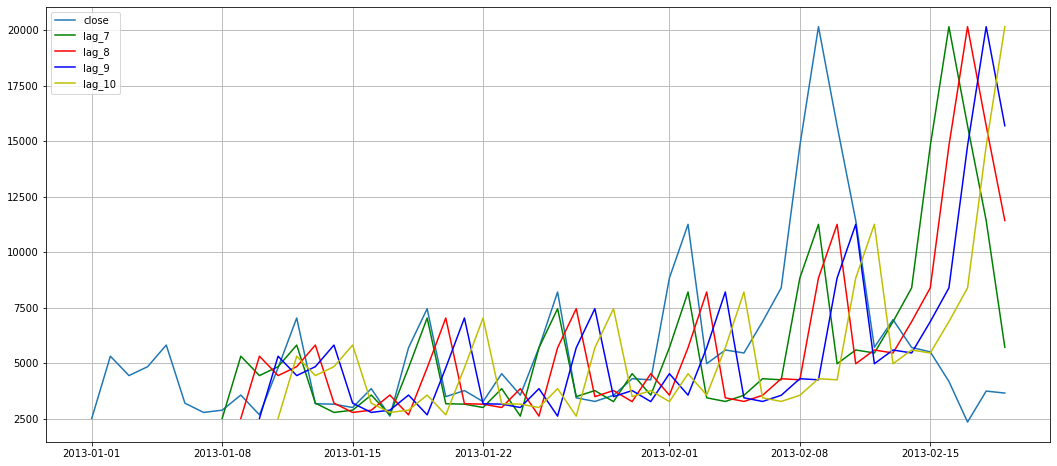

In [562]:
# Получите лаговые факторы с 7-го по 10-й предыдущих дня (лаг7, лаг8, лаг9, лаг10) и отобразите на графике.

df_ = df[:50].copy()  # Возьмем 50 дневных данных
df_ = df_.rename(columns={'unit_sales': 'close'})

for i in range(7, 11):
    df_['lag_{}'.format(i)] = df_.close.shift(i)

f, ax = plt.subplots(1, 1, figsize=(18, 8))
ax.plot(df_.index, df_.close)  # исходные данные
ax.plot(df_.index, df_['lag_' + str(7)],  c='g')
ax.plot(df_.index, df_['lag_' + str(8)],  c='r')
ax.plot(df_.index, df_['lag_' + str(9)],  c='b')
ax.plot(df_.index, df_['lag_' + str(10)],  c='y')

ax.legend(['close', 'lag_7', 'lag_8', 'lag_9', 'lag_10'])
ax.grid()

### Прогнозирование ВР

In [563]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error

# Выберите продукт с номером 103501 (item_nbr) и приведите данные к виду временного
# ряда с группировкой по дате и агрегацией .sum()['unit_sales'].
train = pd.read_csv('train103501.csv')  # считываем датасет
train = train.set_index(pd.DatetimeIndex(train['date']))
train.head()

,date,unit_sales
date,,
2013-01-02,2013-01-02,185.0
2013-01-03,2013-01-03,153.0
2013-01-04,2013-01-04,155.0
2013-01-05,2013-01-05,160.0
2013-01-06,2013-01-06,173.0


<AxesSubplot:xlabel='date'>

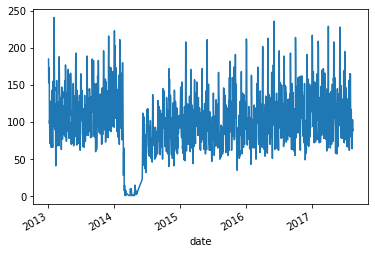

In [564]:
top1 = train.copy()
top1 = top1.set_index(pd.DatetimeIndex(top1['date']))
top1.drop(index=top1[top1.index.duplicated()].index, inplace=True)
top1['date'] = pd.to_datetime(top1['date'])
top1['year'] = top1['date'].dt.year
unit_sales_by_date = top1['unit_sales']

unit_sales_by_date.plot()

In [565]:
unit_sales_by_date.asfreq('D').isna().sum()  # проверим наличие пропусков

62

<AxesSubplot:xlabel='date'>

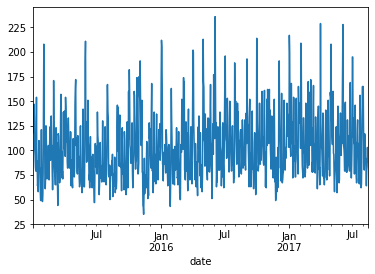

In [566]:
# На графике видна явная нестационарность в 2014 году, в том числе и из-за большого числа пропусков. Так как нам нужно будет предсказывать тестовые данные в 2017, то
# предлагается использовать для трейна данные 2015-2016 гг. На самом деле при проверке это не сильно повлияло на метрики,
# но предсказания выглядят более "гладко".
unit_sales_by_date = top1.loc['2015':, 'unit_sales'].asfreq('D')
unit_sales_by_date = unit_sales_by_date.fillna(unit_sales_by_date.mean())
unit_sales_by_date.plot()

In [567]:
# Проведите тест Адфуллера. Стационарен ли ряд?

from statsmodels.tsa.stattools import adfuller

X = unit_sales_by_date.values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

if result[0] < result[4]["5%"]:
    print("Reject Ho - Time Series is Stationary")
else:
    print("Failed to Reject Ho - Time Series is Non-Stationary")

ADF Statistic: -7.311268
p-value: 0.000000
Critical Values:
	1%: -3.437
	5%: -2.865
	10%: -2.568
Reject Ho - Time Series is Stationary


(951,) (957,)
mean_squared_error 1242.1838614366839
mean_absolute_error 27.854562068829814
mean_absolute_percentage_error 0.28393934006435717


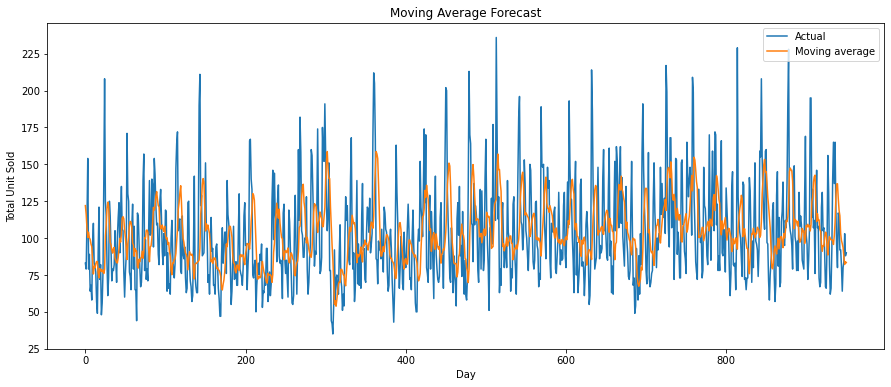

In [568]:
# Постройте прогноз методом скользящего среднего с окном 6, как в ноутбуке выше. Посчитайте метрики MSE, MAE, MAPE.

def moving_average_forecast(series, window_size):
    forecast = []
    for time in range(len(series) - window_size):
        forecast.append(series[time:time + window_size].mean())
    return np.array(forecast)


moving_average_days = 6
moving_avg = moving_average_forecast(unit_sales_by_date, moving_average_days)

print(moving_avg.shape, unit_sales_by_date.shape)

mse = mean_squared_error(
    unit_sales_by_date.values[moving_average_days:], moving_avg)
mae = mean_absolute_error(
    unit_sales_by_date.values[moving_average_days:], moving_avg)
mape = mean_absolute_percentage_error(
    unit_sales_by_date.values[moving_average_days:], moving_avg)
mov_avg = pd.Series(data=[mse, mae, mape], index=[
                    'MSE', 'MAE', 'MAPE'], name='Mov_Avg')
print("mean_squared_error", mse)
print("mean_absolute_error", mae)
print("mean_absolute_percentage_error", mape)


plt.figure(figsize=(15, 6))

plt.plot(unit_sales_by_date.values[moving_average_days:], label="Actual")
plt.plot(moving_avg, label="Moving average")
plt.ylabel("Total Unit Sold")
plt.xlabel("Day")
plt.title("Moving Average Forecast")
plt.legend(loc="upper right")

In [569]:
# Разделите выборку на тренировочную и тестовую таким образом, чтобы в тест попадал весь 2017 год.

x_train = unit_sales_by_date[:'2016'].values
x_test = unit_sales_by_date['2017'].values

df = pd.DataFrame()

df["Original Values"] = unit_sales_by_date
df["shift1"] = df["Original Values"].shift()
df["shift2"] = df["shift1"].shift()
df["shift3"] = df["shift2"].shift()
df["shift4"] = df["shift3"].shift()
df["shift5"] = df["shift4"].shift()
df["shift6"] = df["shift5"].shift()
df["shift7"] = df["shift6"].shift()


lag_value = 7  # - так как пик на АКФ приходится на 7 лаг
df.dropna(inplace=True)


# x_train, y_train = df['2013':'2016'].iloc[:,0:lag_value], df['2013':'2016'].iloc[:,lag_value:]
# x_test, y_test = df['2017'].iloc[:,0:lag_value], df['2017'].iloc[:,lag_value:]

#### Внимание! Это неправильно - тут почему - то в качестве таргета выступает самый последний лаг, а должно быть оригинальное значение. 
#### Поэтому исправляем !!!!

In [570]:
x_train, y_train = df[:'2016'].iloc[:, 1:lag_value +
                                    1].values, df[:'2016'].iloc[:, :1].values
x_test, y_test = df['2017'].iloc[:, 1:lag_value +
                                 1].values, df['2017'].iloc[:, :1].values

[[ 0.53442062 -0.05418616 -0.06527002 -0.0141454  -0.07867005  0.09888683
   0.22999082]]
[35.12384756]
mean_squared_error 825.0350531458265
mean_absolute_error 21.438300949427344
mean_absolute_percentage_error 0.19003548941939713


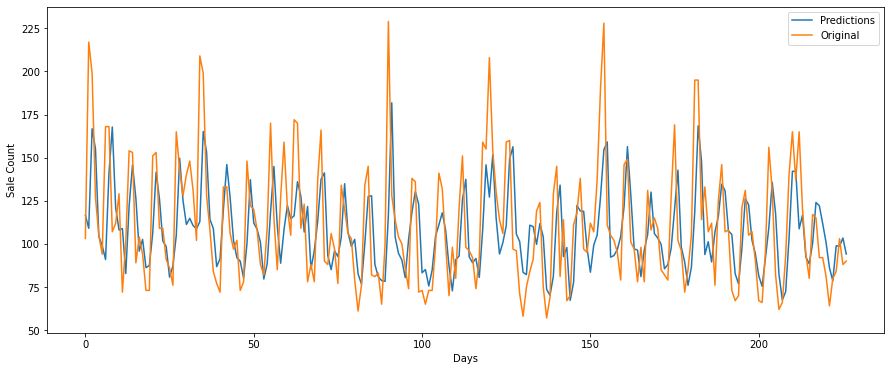

In [571]:
# Сделайте прогноз линейной регрессией, посчитайте значения метрик MSE, MAE, MAPE.


from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(x_train, y_train)
print(reg.coef_)
print(reg.intercept_)


ar_predictions = reg.predict(x_test)

plt.figure(figsize=(15, 6))
plt.plot(ar_predictions, label="Predictions")
plt.plot(y_test, label="Original")
plt.xlabel("Days")
plt.ylabel("Sale Count")

mse = mean_squared_error(y_test, ar_predictions)
mae = mean_absolute_error(y_test, ar_predictions)
mape = mean_absolute_percentage_error(y_test, ar_predictions)

lin_reg = pd.Series(data=[mse, mae, mape], index=[
                    'MSE', 'MAE', 'MAPE'], name='Lin_Reg')
print("mean_squared_error", mse)
print("mean_absolute_error", mae)
print("mean_absolute_percentage_error", mape)


plt.legend(loc="upper right")

Итак, чтобы построить модель нам нужно знать ее порядок, состоящий из 3-х параметров:

p — порядок компоненты AR
d — порядок интегрированного ряда
q — порядок компонетны MA

d мы уже знаем - это 1

осталось определить p и q. Для их определения нам надо изучить авторкорреляционную(ACF) и частично автокорреляционную(PACF) функции для ряда первых разностей.

ACF поможет нам определить q, т. к. по ее коррелограмме можно определить количество автокорреляционных коэффициентов сильно отличных от 0 в модели MA PACF поможет нам определить p, т. к. по ее коррелограмме можно определить максимальный номер коэффициента сильно отличный от 0 в модели AR.

Чтобы построить соответствующие коррелограммы, в пакете statsmodels имеются следующие функции: plot_acf() и plot_pacf(). Они выводят графики ACF и PACF, у которых по оси X откладываются номера лагов, а по оси Y значения соответствующих функций. Нужно отметить, что количество лагов в функциях и определяет число значимых коэффициентов.


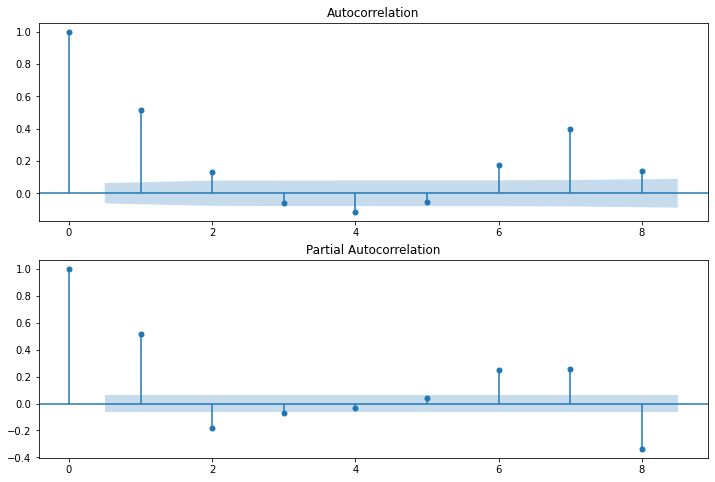

In [572]:
import statsmodels.api as sm
fig = plt.figure(figsize=(12, 8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(
    unit_sales_by_date.values.squeeze(), lags=8, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(unit_sales_by_date, lags=8, ax=ax2)

### p = 6, q = 7 
### ARMA model

In [573]:
# Постройте модели ARMA и ARIMA, сравните метрики.

import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARMA
from datetime import datetime, timedelta
lag_value = 7

 #### Внимание! Это кусок кода из учебного ноутбука.
 Во-первых тут почему - то в качестве таргета выступает самый последний лаг, а должно быть оригинальное значение.

In [574]:
x_train, y_train = df['2013':'2016'].iloc[:,0:lag_value], df['2013':'2016'].iloc[:,lag_value:]
x_test, y_test = df['2017'].iloc[:,0:lag_value], df['2017'].iloc[:,lag_value:]

А во-вторых:

In [575]:
# ARMA_model = ARMA(x_train.values.reshape(-1).tolist(), (6, 7)).fit()

#### !!! вот это вот:
'x_train.values.reshape(-1)'
#### ЧТО ЭТО ТАКОЕ??? 
то есть мы склеиваем все имеющиеся данные с лагами и увеличиваем размер трейна в lag раз и при этом сама обучающая выборка состоит из нескольких самоподобных кусков :

In [576]:
print(len(x_train.values.reshape(-1).tolist()), len(y_train), len(x_train.values.reshape(-1).tolist())/len(y_train))

5061 723 7.0


#### Это какой-то технический прием??? По-моему пора переработать учебный ноутбук.

mean_squared_error 813.6345383827849
mean_absolute_error 20.10240889205768
mean_absolute_percentage_error 0.1674579513101146


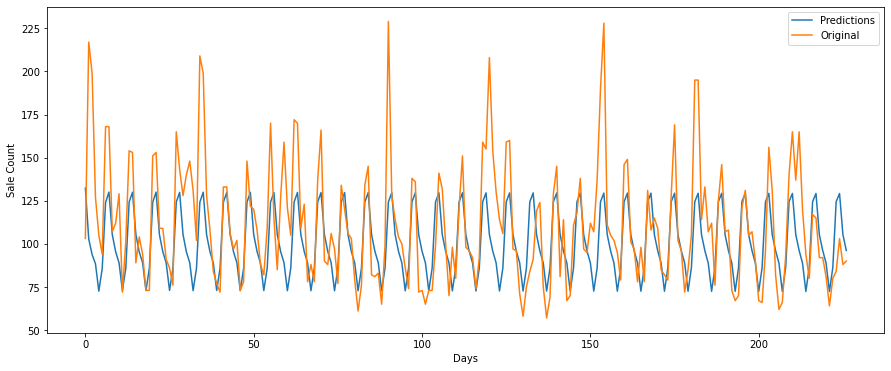

In [577]:
# Исправляем
x_train, y_train = df[:'2016'].iloc[:, 1:lag_value+1], df[:'2016'].iloc[:, :1]
x_test, y_test = df['2017'].iloc[:, 1:lag_value+1], df['2017'].iloc[:, :1]
# теперь y_train содержит оригинальные значения обучающей части ряда
ARMA_model = ARMA(y_train.values, (6, 7)).fit()
arma_predictions = ARMA_model.predict(
    start=len(x_train), end=len(x_train) + len(x_test)-1, dynamic=False)


plt.figure(figsize=(15, 6))
plt.plot(arma_predictions, label="Predictions")
plt.plot(y_test.values, label="Original")
plt.xlabel("Days")
plt.ylabel("Sale Count")
plt.legend(loc="upper right")

mse = mean_squared_error(y_test, arma_predictions)
mae = mean_absolute_error(y_test, arma_predictions)
mape = mean_absolute_percentage_error(y_test, arma_predictions)

arma_ = pd.Series(data=[mse, mae, mape], index=[
                  'MSE', 'MAE', 'MAPE'], name='Mov_Avg')

print("mean_squared_error", mse)
print("mean_absolute_error", mae)
print("mean_absolute_percentage_error", mape)

#### Предсказание на всю длину тестовой выборки?!!! 
Видно, что колебания модель уловила, но значения все таки сильно расходятся по сравнению с линейной регрессией.
Для адекватного сравнения наших моделей на самом деле надо сравнивать их при движении по тестовой выборке используя каждое новое значение для предсказания следующего, как это было в случае с линейной регрессией.¶


### ARIMA model

In [578]:
from statsmodels.tsa.arima_model import ARIMA

# проверяем при d = 1
model = ARIMA(y_train.values, order=(6, 1, 7)).fit()

In [579]:
# шаманизм для того чтобы не повторялись графики matplotlib
%matplotlib 
%matplotlib

Using matplotlib backend: Qt5Agg
Using matplotlib backend: Qt5Agg


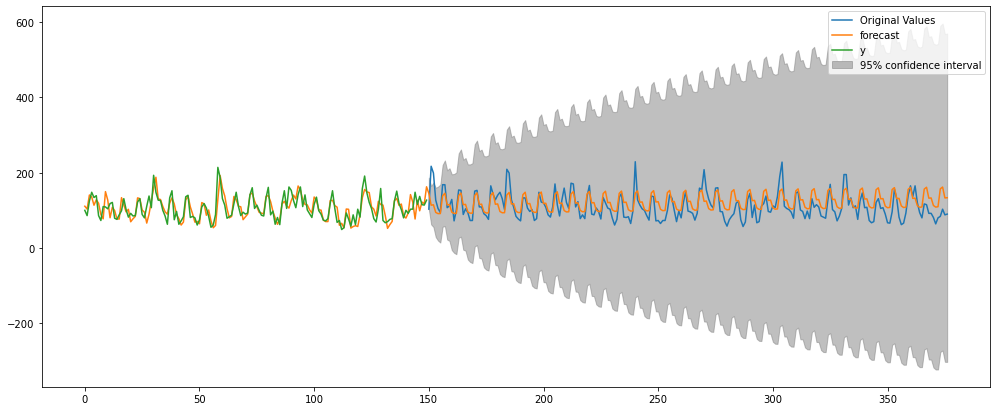

In [580]:
fig, ax = plt.subplots(figsize=(17, 7))
shown_train_size = 150
train_size = len(y_train.values)
test_size = len(x_test.values)
y_test.index = pd.Series(
    range(shown_train_size, shown_train_size + test_size)).to_list()
ax = y_test.plot(ax=ax)
model.plot_predict(start=train_size-shown_train_size, end=train_size +
                   test_size - 1, dynamic=False, plot_insample=True, ax=ax)


In [581]:
plt.close('all') # закроем появившееся окно 
%matplotlib inline

In [582]:
arima_predictions = model.predict(train_size, train_size + test_size - 1)

mse = mean_squared_error(y_test, arima_predictions)
mae = mean_absolute_error(y_test, arima_predictions)
mape = mean_absolute_percentage_error(y_test, arima_predictions)

arima_ = pd.Series(data=[mse, mae, mape], index=[
                   'MSE', 'MAE', 'MAPE'], name='Mov_Avg')

print("mean_squared_error", mse)
print("mean_absolute_error", mae)
print("mean_absolute_percentage_error", mape)

mean_squared_error 13439.472131817709
mean_absolute_error 110.98972267930418
mean_absolute_percentage_error 1.0217337371721562


### Замечание.
Совершенно дикие результаты по сравнению с линейной регрессией. Это потому, что мы используем здесь модели ARMA и ARIMA для предсказания значений на всю тестовую выборку не получая новых данных с этой выборки. Иначе говоря, надо обучить модель на трейне и потом беря новые данные из тестовой выборки продвигаться вперед делая прогноз на один шаг. Тогда можно будет адекватно сравнивать эти  модели с прогнозом от линейной регрессии. 

### Cross validation




A common use case is to cross-validate forecasting methods by performing 1-step-ahead forecasts recursively using the following process:

    Fit model parameters on a training sample

    Produce 1-step-ahead forecasts from the end of that sample

    Compare forecasts against test dataset to compute error rate

    Expand the sample to include the next observation, and repeat

Economists sometimes call this a pseudo-out-of-sample forecast evaluation exercise, or time-series cross-validation.

In [583]:
# ARMA multi-step forecasting
from statsmodels.tsa.arima.model import ARIMA

import warnings
from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.simplefilter('ignore', ConvergenceWarning)

# Setup forecasts
nforecasts = 1  # make one-step forecast
forecasts = {}

y_train = df[:'2016'].iloc[:, :1]
y_test = df['2017'].iloc[:, :1]


endog = pd.concat([y_train, y_test])['Original Values'][:-1].asfreq('D')

# Get the number of initial training observations
nobs = len(endog)
n_init_training = len(y_train)

# Create model for initial training sample, fit parameters
init_training_endog = endog.iloc[:n_init_training]


mod = ARIMA(init_training_endog, order=(6, 0, 7))  # Обучим нашу модель
res = mod.fit()

# Save initial forecast
fc_res = res.get_forecast(steps=nforecasts)
tmp = fc_res.conf_int()
tmp['predicted'] = fc_res.predicted_mean
forecasts[init_training_endog.index[-1]] = tmp

# Step through the rest of the sample
for t in range(n_init_training, nobs):
    # Update the results by appending the next observation
    updated_endog = endog.iloc[t:t+1]
    res = res.extend(updated_endog)
    fc_res = res.get_forecast(steps=nforecasts)
    tmp = fc_res.conf_int()
    tmp['predicted'] = fc_res.predicted_mean
    # Save the new set of forecasts
    forecasts[updated_endog.index[0]] = tmp


# Combine all forecasts into a dataframe
forecasts_ = pd.concat(forecasts)
forecasts_.index = forecasts_.index.droplevel(level=0)

In [584]:
mod = ARIMA(init_training_endog, order=(6, 0, 7))  # Обучим нашу модель
res = mod.fit()
print(res.summary())

                               SARIMAX Results                                
Dep. Variable:        Original Values   No. Observations:                  723
Model:                 ARIMA(6, 0, 7)   Log Likelihood               -3244.955
Date:                Tue, 21 Dec 2021   AIC                           6519.910
Time:                        14:19:40   BIC                           6588.661
Sample:                    01-09-2015   HQIC                          6546.446
                         - 12-31-2016                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        100.5450      2.992     33.608      0.000      94.681     106.409
ar.L1          0.4028      0.108      3.734      0.000       0.191       0.614
ar.L2         -0.5623      0.100     -5.648      0.0

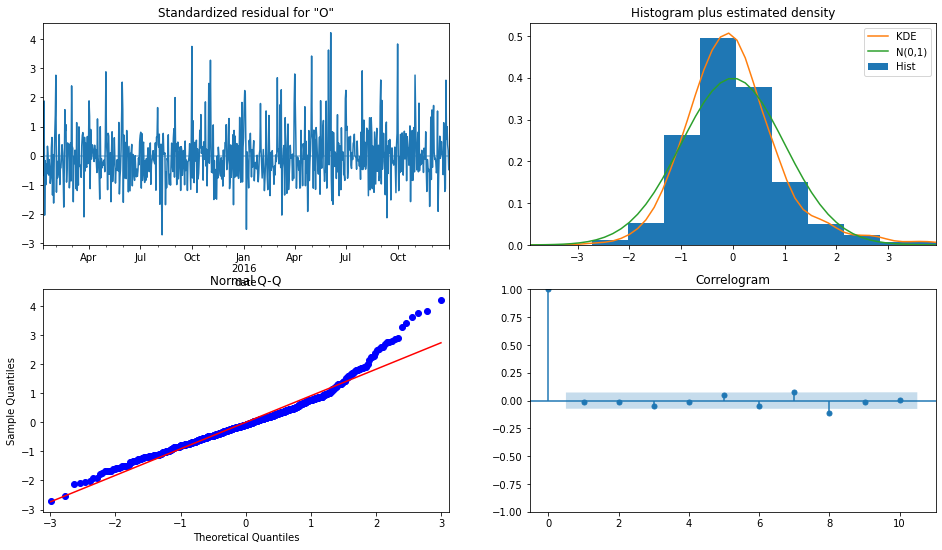

In [585]:
# Посмотрим на остаточный шум
fig = plt.figure(figsize=(16, 9))
fig = res.plot_diagnostics(fig=fig )

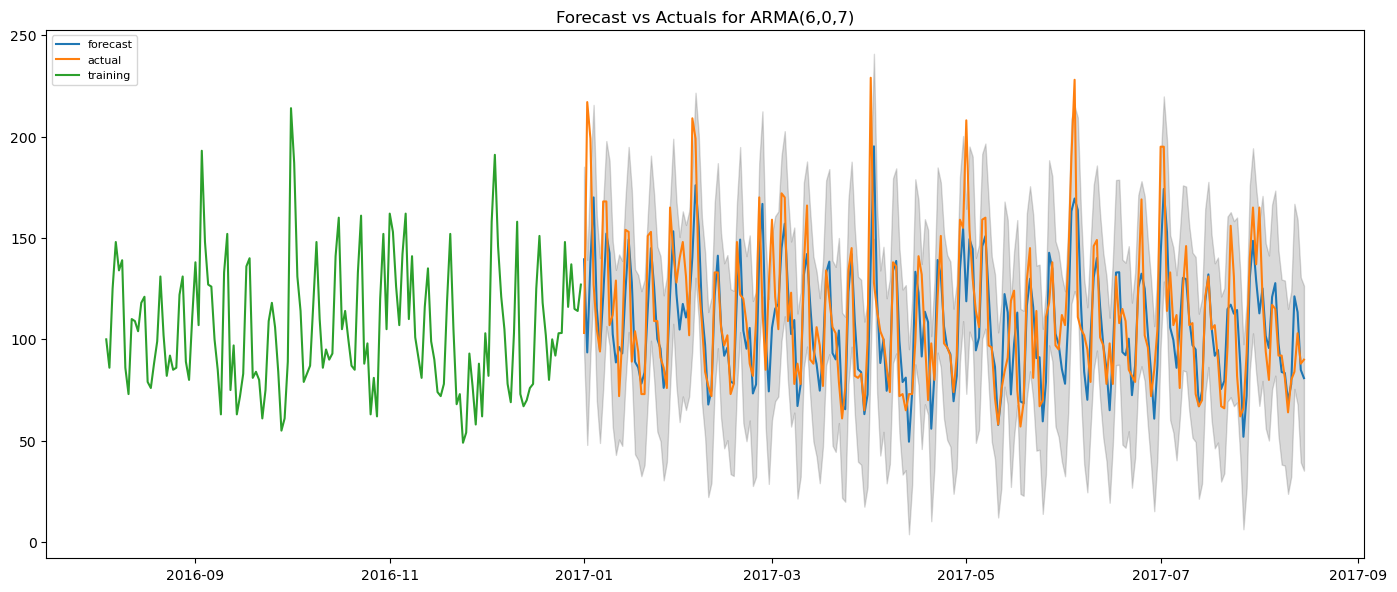

In [586]:
lower_series = forecasts_['lower Original Values']
upper_series = forecasts_['upper Original Values']
predicted_series = forecasts_['predicted']

# Plot
plt.figure(figsize=(17, 7), dpi=100)

plt.plot(predicted_series, label='forecast')
plt.plot(y_test, label='actual')
plt.plot(y_train[-150:], label='training')
plt.fill_between(lower_series.index, lower_series, upper_series,
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals for ARMA(6,0,7)')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [587]:
mse = mean_squared_error(y_test, predicted_series)
mae = mean_absolute_error(y_test, predicted_series)
mape = mean_absolute_percentage_error(y_test, predicted_series)

arma_cv = pd.Series(data=[mse, mae, mape], index=[
    'MSE', 'MAE', 'MAPE'], name='Mov_Avg')

print("mean_squared_error", mse)
print("mean_absolute_error", mae)
print("mean_absolute_percentage_error", mape)

mean_squared_error 641.0115704342679
mean_absolute_error 18.59843138231916
mean_absolute_percentage_error 0.16497415759647333


In [588]:
# ARIMA multi-step forecasting
from statsmodels.tsa.arima.model import ARIMA

import warnings
from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.simplefilter('ignore', ConvergenceWarning)

# Setup forecasts
nforecasts = 1  # make one-step forecast
forecasts = {}

y_train = df[:'2016'].iloc[:, :1]
y_test = df['2017'].iloc[:, :1]


endog = pd.concat([y_train, y_test])['Original Values'][:-1].asfreq('D')

# Get the number of initial training observations
nobs = len(endog)
n_init_training = len(y_train)

# Create model for initial training sample, fit parameters
init_training_endog = endog.iloc[:n_init_training]


mod = ARIMA(init_training_endog, order=(6, 1, 7))  # Обучим нашу модель
res = mod.fit()

# Save initial forecast
fc_res = res.get_forecast(steps=nforecasts)
tmp = fc_res.conf_int()
tmp['predicted'] = fc_res.predicted_mean
forecasts[init_training_endog.index[-1]] = tmp

# Step through the rest of the sample
for t in range(n_init_training, nobs):
    # Update the results by appending the next observation
    updated_endog = endog.iloc[t:t+1]
    res = res.extend(updated_endog)
    fc_res = res.get_forecast(steps=nforecasts)
    tmp = fc_res.conf_int()
    tmp['predicted'] = fc_res.predicted_mean
    # Save the new set of forecasts
    forecasts[updated_endog.index[0]] = tmp


# Combine all forecasts into a dataframe
forecasts_ = pd.concat(forecasts)
forecasts_.index = forecasts_.index.droplevel(level=0)

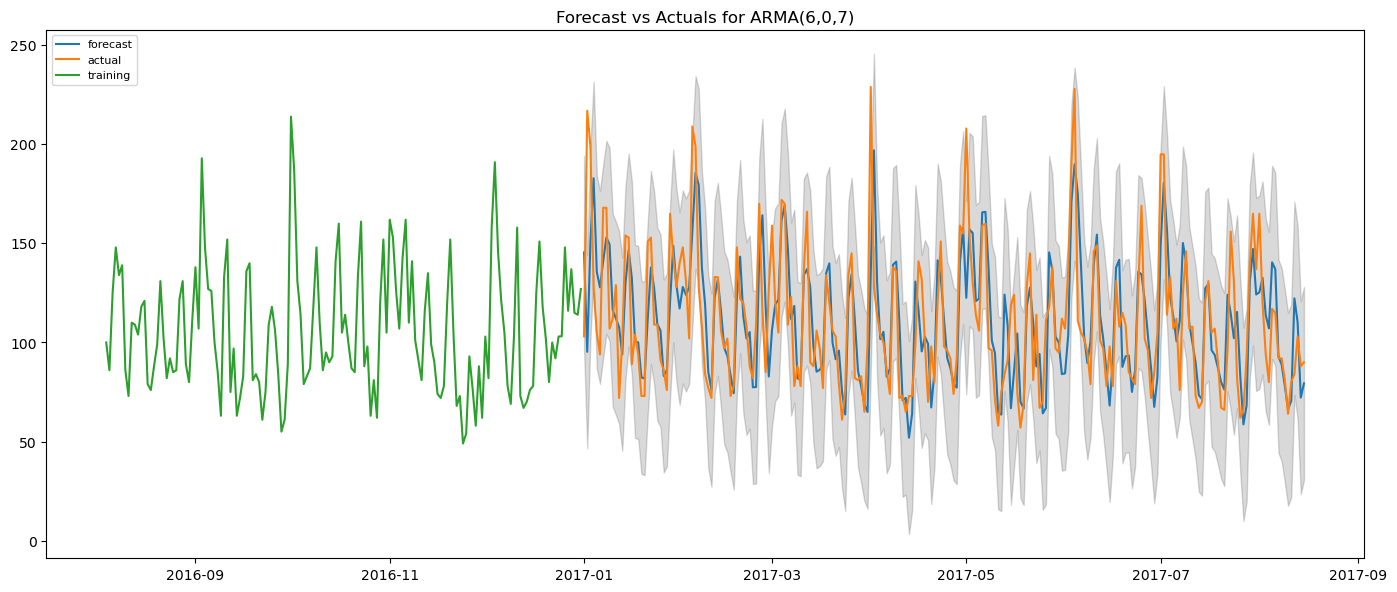

In [589]:
lower_series = forecasts_['lower Original Values']
upper_series = forecasts_['upper Original Values']
predicted_series = forecasts_['predicted']

# Plot
plt.figure(figsize=(17, 7), dpi=100)

plt.plot(predicted_series, label='forecast')
plt.plot(y_test, label='actual')
plt.plot(y_train[-150:], label='training')
plt.fill_between(lower_series.index, lower_series, upper_series,
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals for ARMA(6,0,7)')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [590]:
mse = mean_squared_error(y_test, predicted_series)
mae = mean_absolute_error(y_test, predicted_series)
mape = mean_absolute_percentage_error(y_test, predicted_series)

arima_cv = pd.Series(data=[mse, mae, mape], index=[
    'MSE', 'MAE', 'MAPE'], name='Mov_Avg')

print("mean_squared_error", mse)
print("mean_absolute_error", mae)
print("mean_absolute_percentage_error", mape)

mean_squared_error 655.2993799374336
mean_absolute_error 18.962811558233568
mean_absolute_percentage_error 0.17270010358910626


### Сравним метрики:

In [591]:
pd.DataFrame({'MA': mov_avg, 'LinReg': lin_reg,
              'ARMA_fixed': arma_, 'ARIMA_fixed': arima_, 'ARMA_CV': arma_cv, 'ARIMA_CV': arima_cv})

,MA,LinReg,ARMA_fixed,ARIMA_fixed,ARMA_CV,ARIMA_CV
MSE,1242.183861,825.035053,813.634538,13439.472132,641.011570,655.299380
MAE,27.854562,21.438301,20.102409,110.989723,18.598431,18.962812
MAPE,0.283939,0.190035,0.167458,1.021734,0.164974,0.172700


### Оценка результатов:
Наилучшей моделью оказалась ARMA (при тестировании multi-step walk-forward). И это при том, что обновления весов во время пробега по тестовой выборке не проводилось (модель была обучена только единожды на трейне).  

### Prophet. Практика

Мне не удалось установить модуль 'fbprophet' поэтому эта часть итогового проекта выполнена на kaggle.com 

https://www.kaggle.com/dmitrykhoteenkov/prophet-notebook/notebook?kernelSessionId=82763802


тем не менее я привожу здесь код на всякий случай:

# Бустинги/деревья. Практика

## Прогнозирование временных рядов с использованием XGBoost


В этом блокноте мы рассмотрим прогнозирование временных рядов с помощью XGBoost. 


In [592]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import xgboost as xgb
from xgboost import plot_importance, plot_tree
from sklearn.metrics import mean_squared_error, mean_absolute_error
from catboost import CatBoostRegressor
import warnings
warnings.filterwarnings('ignore')

# Данные
Будем использовать временной ряд 'all_transactions.csv' - все транзакции из 'train.csv' сгуппированные по датам

In [593]:
unit_sales = pd.read_csv('all_transactions.csv', index_col=[0], parse_dates=[0])
u=unit_sales.copy()
unit_sales.head()


,unit_sales
date,
2013-01-01,2511.619
2013-01-02,496092.418
2013-01-03,361429.231
2013-01-04,354459.677
2013-01-05,477350.121


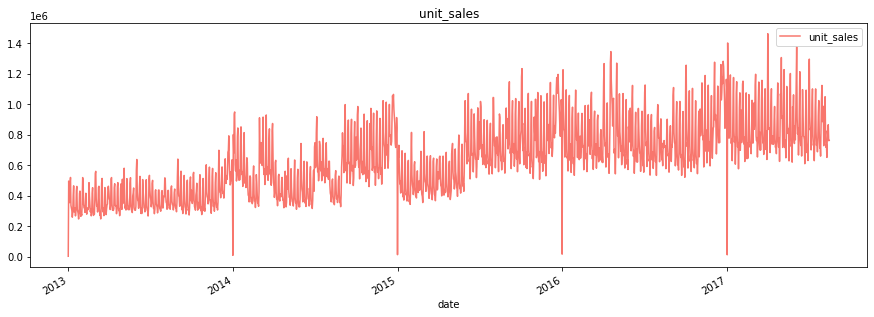

In [594]:
color_pal = ["#F8766D", "#D39200", "#93AA00", "#00BA38", "#00C19F", "#00B9E3", "#619CFF", "#DB72FB"]
_ = unit_sales.plot(style='-', figsize=(15,5), color=color_pal[0], title='unit_sales')

# Train / Test Split
Отрежем данные после 2016 года, чтобы использовать их в качестве набора для проверки.

In [595]:
split_date = '01-Jan-2016'
unit_sales_train = unit_sales.loc[unit_sales.index <= split_date].copy()
unit_sales_test = unit_sales.loc[unit_sales.index > split_date].copy()
print(len(unit_sales_test)/len(unit_sales))

0.3509501187648456


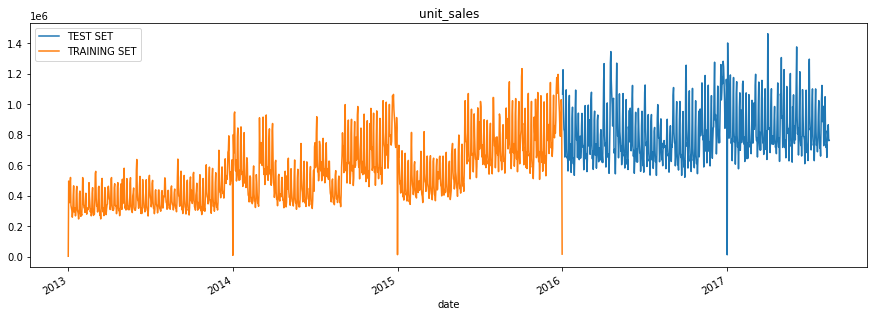

In [596]:
_ = unit_sales_test \
    .rename(columns={'unit_sales': 'TEST SET'}) \
    .join(unit_sales_train.rename(columns={'unit_sales': 'TRAINING SET'}), how='outer') \
    .plot(figsize=(15,5), title='unit_sales', style='-')

# Создадим признаки

In [597]:
def create_features(df, label=None):
    """
    создаем признаки из datetime индекса
    """
    df['date'] = df.index

    df['dayofweek'] = df['date'].dt.dayofweek
    df['quarter'] = df['date'].dt.quarter
    df['month'] = df['date'].dt.month
    df['year'] = df['date'].dt.year
    df['dayofyear'] = df['date'].dt.dayofyear
    df['dayofmonth'] = df['date'].dt.day
    df['weekofyear'] = df['date'].dt.weekofyear
    
    X = df[['dayofweek','quarter','month','year',
           'dayofyear','dayofmonth','weekofyear']]
    if label:
        y = df[label]
        return X, y
    return X


In [598]:
X_train, y_train = create_features(unit_sales_train, label='unit_sales')
X_test, y_test = create_features(unit_sales_test, label='unit_sales')

# Создадим XGBoost Model

In [599]:
reg = xgb.XGBRegressor(n_estimators=1000)
reg.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        early_stopping_rounds=50,
       verbose=False) # Измените verbose на True, если хотите увидеть процесс обучения

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=1000, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

## Важность признаков
Важность признаков - отличный способ получить общее представление о том, на какие признаки модель больше всего полагается при прогнозировании. Это показатель, который просто суммирует, сколько раз каждая функция была разделена. Можно посмотреть с помощью plot_importance


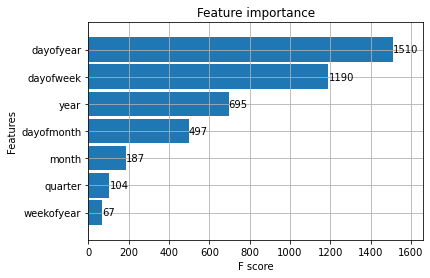

In [600]:
_ = plot_importance(reg, height=0.9)


Мы видим, что день года чаще всего использовался для разделения деревьев, а затем следуют час и год. Квартал имеет невысокую важность в связи с тем, что он мог быть создан разным разбиением по дням и годам.

# Предсказание на Test Set

In [601]:
unit_sales_test['Prediction'] = reg.predict(X_test)
unit_sales_all = pd.concat([unit_sales_test, unit_sales_train], sort=False)

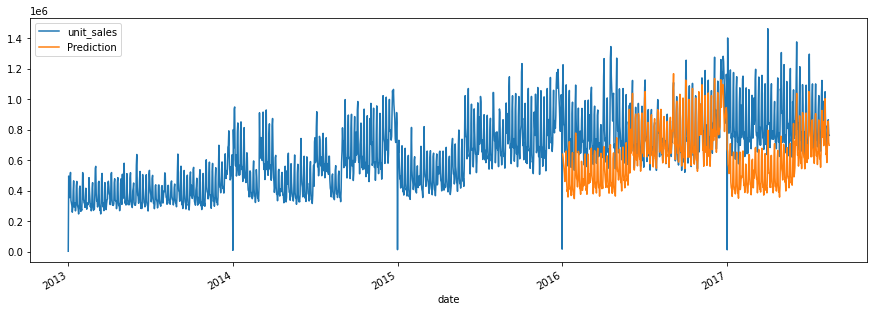

In [602]:
_ = unit_sales_all[['unit_sales','Prediction']].plot(figsize=(15, 5))

# Ошибки на Test Set

In [603]:
mean_squared_error(y_true=unit_sales_test['unit_sales'],
                   y_pred=unit_sales_test['Prediction'])

61906229141.88579

In [604]:
mean_absolute_error(y_true=unit_sales_test['unit_sales'],
                   y_pred=unit_sales_test['Prediction'])

195362.5420791032

Неплохо использовать средний абсолютный процент ошибки, потому что он дает легко интерпретируемый процент, показывающий, насколько ошибочны прогнозы.
MAPE не включен в sklearn, поэтому нам нужно использовать настраиваемую функцию.

In [605]:
def mean_absolute_percentage_error(y_true, y_pred): 
    """считаем MAPE по y_true и y_pred"""
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [606]:
mean_absolute_percentage_error(y_true=unit_sales_test['unit_sales'],
                   y_pred=unit_sales_test['Prediction'])

32.37158594923706

# Сравним с CatBoost

In [607]:
cbr = CatBoostRegressor(n_estimators=1000)
cbr.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        early_stopping_rounds=50,
       verbose=False)

In [608]:
unit_sales_test['Prediction_catboost'] = cbr.predict(X_test)
unit_sales_all = pd.concat([unit_sales_test, unit_sales_train], sort=False)

In [609]:
mean_squared_error(y_true=unit_sales_test['unit_sales'],
                   y_pred=unit_sales_test['Prediction_catboost']), mean_absolute_error(y_true=unit_sales_test['unit_sales'],
                   y_pred=unit_sales_test['Prediction_catboost'])

(61859124473.30218, 199299.64193090197)

In [610]:
mean_absolute_percentage_error(y_true=unit_sales_test['unit_sales'],
                   y_pred=unit_sales_test['Prediction_catboost'])

29.41958414527664

Ошибка не сильно отличается от результатов XGBoost.

# Что дальше?
- Можно добавить лаги
- Добавить праздники
- Добавить погодные условия

### Добавляем лаги. Количество лагов посмотрим на АКФ.. После экспериментов оказалось лучше всего взять lag = 8

In [611]:
def create_features_with_lags(df,lag, label=None):
    """
    создаем признаки из datetime индекса
    """
    df['date'] = df.index

    df['dayofweek'] = df['date'].dt.dayofweek
    df['quarter'] = df['date'].dt.quarter
    df['month'] = df['date'].dt.month
    df['year'] = df['date'].dt.year
    df['dayofyear'] = df['date'].dt.dayofyear
    df['dayofmonth'] = df['date'].dt.day
    df['weekofyear'] = df['date'].dt.weekofyear
    col_list = ['dayofweek','quarter','month','year',
           'dayofyear','dayofmonth','weekofyear']
    
    for i in range(1,lag+1):
        df['lag_{}'.format(i)] = df.unit_sales.shift(i)
        col_list.append('lag_{}'.format(i))
    
    X = df[col_list][lag:] # берем данные без nan
    if label:
        y = df[label][lag:]  # берем данные без nan
        return X, y
    return X[lag:]

lag = 8

split_date = '01-Jan-2016'
unit_sales_train = unit_sales.loc[unit_sales.index <= split_date].copy()
unit_sales_test = unit_sales.loc[unit_sales.index > split_date].copy()

X_train, y_train = create_features_with_lags(unit_sales_train, lag = lag, label='unit_sales')
X_test, y_test = create_features_with_lags(unit_sales_test, lag = lag, label='unit_sales')

In [612]:
X_train.head()

,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,lag_8
date,,,,,,,,,,,,,,,
2013-01-09,2,1,1,2013,9,9,2,318347.778,336122.801,519695.401,477350.121,354459.677,361429.231,496092.418,2511.619
2013-01-10,3,1,1,2013,10,10,2,302530.809,318347.778,336122.801,519695.401,477350.121,354459.677,361429.231,496092.418
2013-01-11,4,1,1,2013,11,11,2,258982.003,302530.809,318347.778,336122.801,519695.401,477350.121,354459.677,361429.231
2013-01-12,5,1,1,2013,12,12,2,289737.685,258982.003,302530.809,318347.778,336122.801,519695.401,477350.121,354459.677
2013-01-13,6,1,1,2013,13,13,2,403257.212,289737.685,258982.003,302530.809,318347.778,336122.801,519695.401,477350.121


In [613]:
unit_sales_test = unit_sales_test[lag:] 

### XGBoost with Lags

In [614]:
reg = xgb.XGBRegressor(n_estimators=1000)
reg.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        early_stopping_rounds=50,
       verbose=False) # Измените verbose на True, если хотите увидеть процесс обучения

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=1000, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

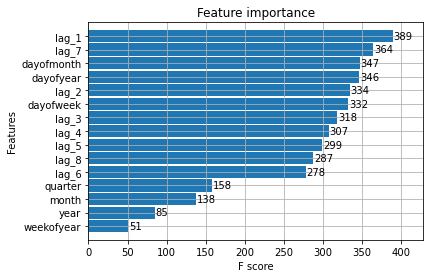

In [615]:
_ = plot_importance(reg, height=0.9)

Значимость лагов оказалась очень значительной!

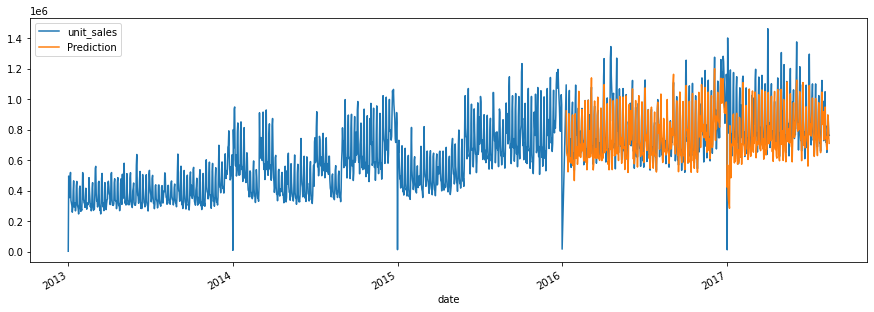

In [616]:
unit_sales_test['Prediction'] = reg.predict(X_test)
unit_sales_all = pd.concat([unit_sales_test, unit_sales_train], sort=False)
_ = unit_sales_all[['unit_sales','Prediction']].plot(figsize=(15, 5))

In [617]:
mean_absolute_percentage_error(y_true=unit_sales_test['unit_sales'],
                   y_pred=unit_sales_test['Prediction'])

15.170126168718676

### Catboost with Lags

In [618]:
cbr = CatBoostRegressor(n_estimators=1000)
cbr.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        early_stopping_rounds=50,
       verbose=False)

In [619]:

unit_sales_test['Prediction_catboost'] = cbr.predict(X_test)
unit_sales_all = pd.concat([unit_sales_test, unit_sales_train], sort=False)

In [620]:
mean_squared_error(y_true=unit_sales_test['unit_sales'],
                   y_pred=unit_sales_test['Prediction_catboost']), mean_absolute_error(y_true=unit_sales_test['unit_sales'],
                   y_pred=unit_sales_test['Prediction_catboost'])

(18441244118.362118, 94762.99148825802)

In [621]:
mean_absolute_percentage_error(y_true=unit_sales_test['unit_sales'],
                   y_pred=unit_sales_test['Prediction_catboost'])

16.683612618625922

### Добавим праздники

In [622]:
holidays = pd.read_csv('holidays_events.csv') # События и праздники Эквадора
holidays = holidays.set_index(pd.DatetimeIndex(holidays['date'])).drop(columns=['date'])
holidays.tail()

,type,locale,locale_name,description,transferred
date,,,,,
2017-12-22,Additional,National,Ecuador,Navidad-3,False
2017-12-23,Additional,National,Ecuador,Navidad-2,False
2017-12-24,Additional,National,Ecuador,Navidad-1,False
2017-12-25,Holiday,National,Ecuador,Navidad,False
2017-12-26,Additional,National,Ecuador,Navidad+1,False


In [623]:
# Закодируем признак 'is_holiday'
holidays['is_holiday'] = 0
#holidays.loc[holidays.type=='Holiday','is_holiday'] = 1
holidays.loc[holidays.locale=='National','is_holiday'] = 1 # учтем все национальные события Эквадора
h_d = holidays.to_dict()

In [624]:
# Перезагрузим ряд unit_sales, так как эта переменная ранее менялась  : unit_sales_test = unit_sales_test[lag:] 
unit_sales= pd.read_csv('all_transactions.csv', index_col=[0], parse_dates=[0])

def mf(x):
    try:
        x.is_holiday = h_d['is_holiday'][x.name] 
    except:
        x.is_holiday = 0
    return x.astype(int)

unit_sales['is_holiday'] = 0
unit_sales = unit_sales.apply(mf,1) # Добавим признак праздника в unit_sales
unit_sales.head()

,unit_sales,is_holiday
date,,
2013-01-01,2511,1
2013-01-02,496092,0
2013-01-03,361429,0
2013-01-04,354459,0
2013-01-05,477350,1


In [625]:
split_date = '01-Jan-2016'
unit_sales_train = unit_sales.loc[unit_sales.index <= split_date].copy()
unit_sales_test = unit_sales.loc[unit_sales.index > split_date].copy()

def create_features_with_lags_holidays(df,lag, label=None):
    """
    создаем признаки из datetime индекса
    """
    df['date'] = df.index

    df['dayofweek'] = df['date'].dt.dayofweek
    df['quarter'] = df['date'].dt.quarter
    df['month'] = df['date'].dt.month
    df['year'] = df['date'].dt.year
    df['dayofyear'] = df['date'].dt.dayofyear
    df['dayofmonth'] = df['date'].dt.day
    df['weekofyear'] = df['date'].dt.weekofyear
    col_list = ['dayofweek','quarter','month','year',
           'dayofyear','dayofmonth','weekofyear','is_holiday']
    
    for i in range(1,lag+1):
        df['lag_{}'.format(i)] = df.unit_sales.shift(i)
        col_list.append('lag_{}'.format(i))
    
    X = df[col_list][lag:] # берем данные без nan
    if label:
        y = df[label][lag:]  # берем данные без nan
        return X, y
    return X[lag:]
lag = 8
X_train, y_train = create_features_with_lags_holidays(unit_sales_train, lag = lag, label='unit_sales')
X_test, y_test = create_features_with_lags_holidays(unit_sales_test, lag = lag, label='unit_sales')
unit_sales_test = unit_sales_test[lag:] 

In [626]:
X_train.head()

,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear,is_holiday,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,lag_8
date,,,,,,,,,,,,,,,,
2013-01-09,2,1,1,2013,9,9,2,0,318347.0,336122.0,519695.0,477350.0,354459.0,361429.0,496092.0,2511.0
2013-01-10,3,1,1,2013,10,10,2,0,302530.0,318347.0,336122.0,519695.0,477350.0,354459.0,361429.0,496092.0
2013-01-11,4,1,1,2013,11,11,2,0,258982.0,302530.0,318347.0,336122.0,519695.0,477350.0,354459.0,361429.0
2013-01-12,5,1,1,2013,12,12,2,1,289737.0,258982.0,302530.0,318347.0,336122.0,519695.0,477350.0,354459.0
2013-01-13,6,1,1,2013,13,13,2,0,403257.0,289737.0,258982.0,302530.0,318347.0,336122.0,519695.0,477350.0


### XGBoost with Lags and Holidays

In [627]:
reg = xgb.XGBRegressor(n_estimators=1000)
reg.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        early_stopping_rounds=50,
       verbose=False) # Измените verbose на True, если хотите увидеть процесс обучения

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=1000, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

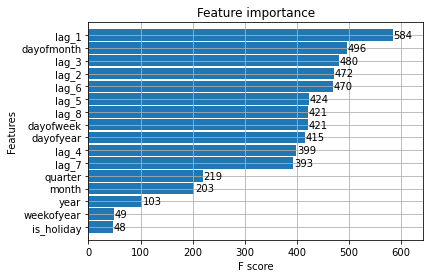

In [628]:
_ = plot_importance(reg, height=0.9)

Значимость праздников самая низкая...

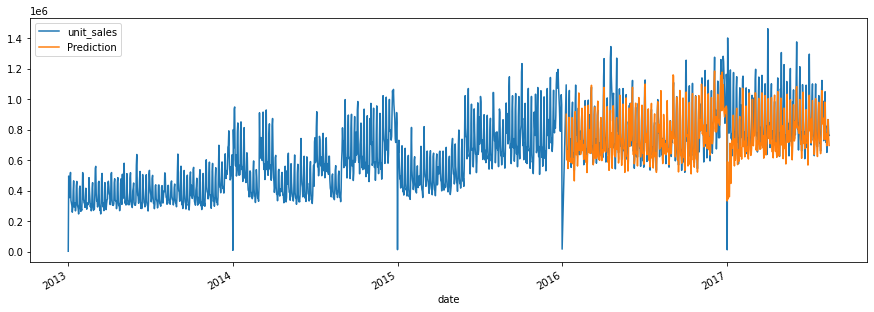

In [629]:
unit_sales_test['Prediction'] = reg.predict(X_test)
unit_sales_all = pd.concat([unit_sales_test, unit_sales_train], sort=False)
_ = unit_sales_all[['unit_sales','Prediction']].plot(figsize=(15, 5))

In [630]:
mean_absolute_percentage_error(y_true=unit_sales_test['unit_sales'],
                   y_pred=unit_sales_test['Prediction'])

13.51211906917602

### Catboost with Lags and Holidays

In [631]:
cbr = CatBoostRegressor(n_estimators=1000)
cbr.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        early_stopping_rounds=50,
       verbose=False)

In [632]:
unit_sales_test['Prediction_catboost'] = cbr.predict(X_test)
unit_sales_all = pd.concat([unit_sales_test, unit_sales_train], sort=False)

In [633]:
mean_squared_error(y_true=unit_sales_test['unit_sales'],
                   y_pred=unit_sales_test['Prediction_catboost']), mean_absolute_error(y_true=unit_sales_test['unit_sales'],
                   y_pred=unit_sales_test['Prediction_catboost'])

(19935848379.619076, 99253.44504259832)

In [634]:
mean_absolute_percentage_error(y_true=unit_sales_test['unit_sales'],
                   y_pred=unit_sales_test['Prediction_catboost'])

16.700612363348625

### Вывод:
Добавление лагов оказало наибольшее влияние на метрики моделей (снижение до 50% MAPE). 
Добавление праздников также обеспечило некоторое дальнейшее улучшение метрик на ~ 1.5%